<div style="direction: rtl; white-space: pre-wrap; line-height: 1.5;">


🎯 هدف:
تحلیل و پیش‌بینی نمره نهایی درس زبان پرتغالی (G3) با الگوریتم‌های یادگیری ماشین، مشابه پروژه ریاضی.


</div>

In [9]:
# Import pandas
import pandas as pd

# Load the Portuguese language dataset
df_por = pd.read_csv('dataset/student-por.csv', sep=';', quotechar='"')

# Display shape and first rows
print("Shape of Portuguese dataset:", df_por.shape)
df_por.head()


Shape of Portuguese dataset: (649, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [10]:
# Check data types of all columns
df_por.dtypes


school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [11]:
# Check for missing values in each column
df_por.isnull().sum()


school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [12]:
# Check for duplicate rows
df_por.duplicated().sum()


0

In [13]:
# Summary statistics for numerical features
df_por.describe()


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


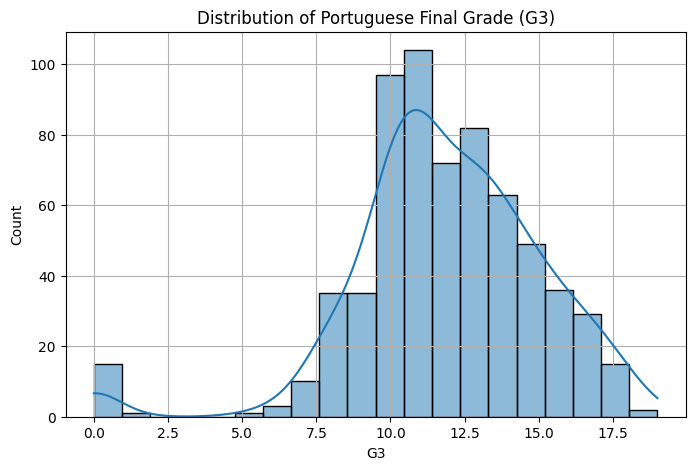

In [14]:
# Visualize the distribution of final grades (G3) in Portuguese subject
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(df_por['G3'], bins=20, kde=True)
plt.title("Distribution of Portuguese Final Grade (G3)")
plt.xlabel("G3")
plt.ylabel("Count")
plt.grid(True)
plt.show()


### Outliers


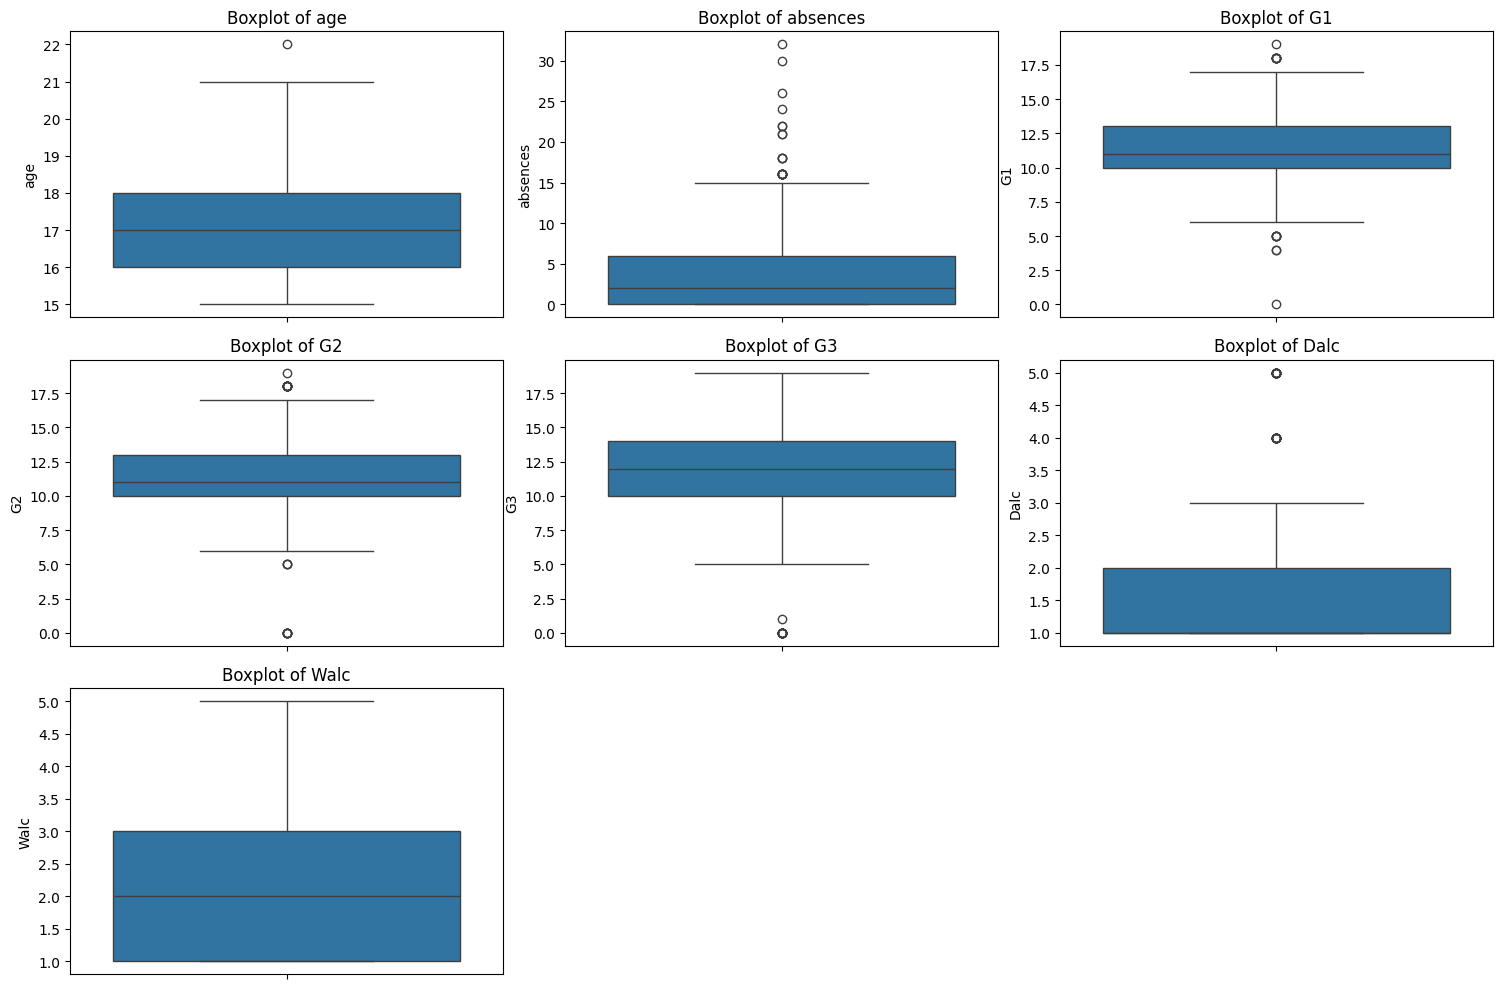

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('dataset/student-por.csv', sep=';')

# Select numeric columns
numeric_cols = ['age', 'absences', 'G1', 'G2', 'G3', 'Dalc', 'Walc']

# Plot boxplots for outlier detection
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


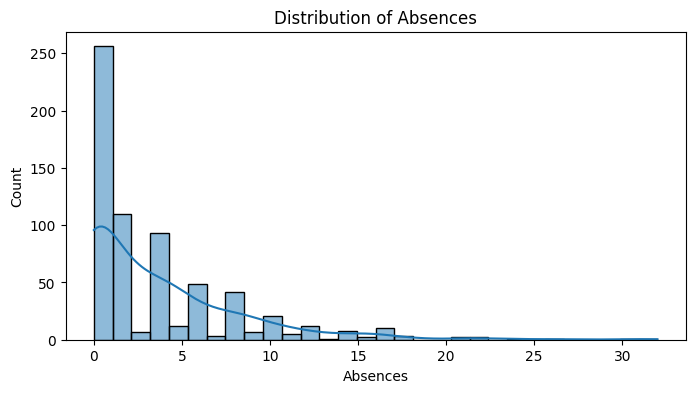

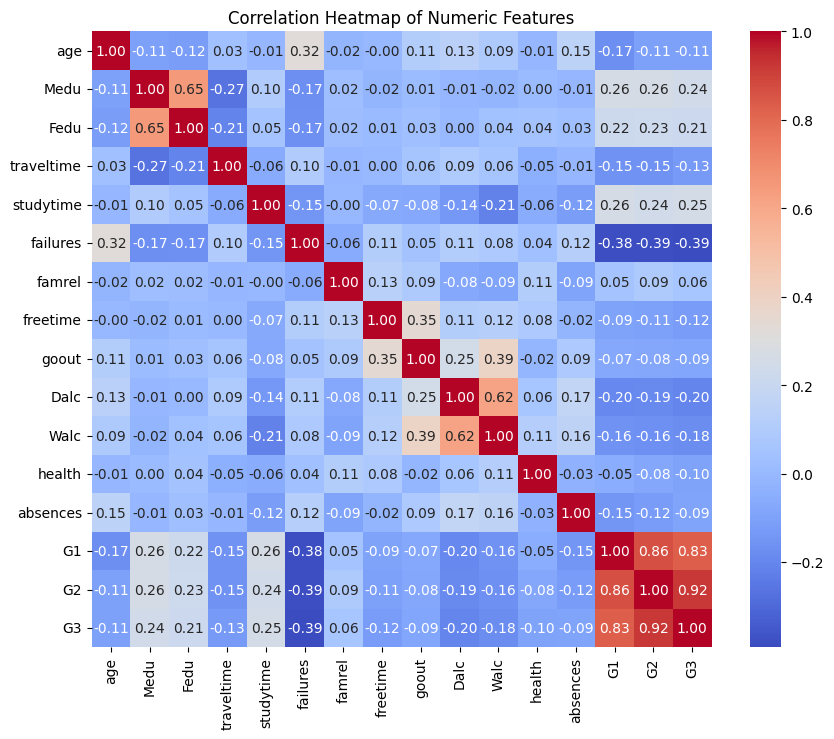

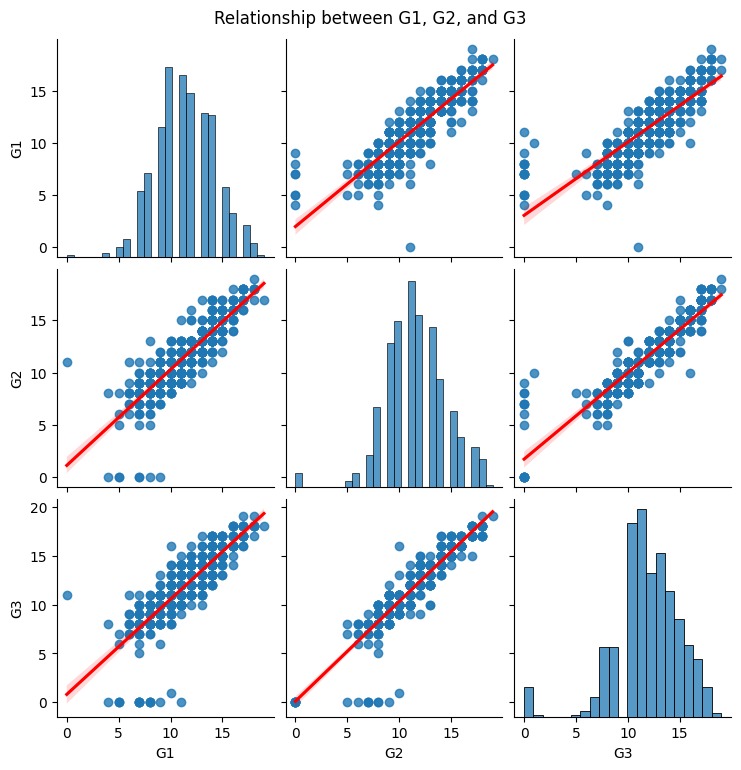

In [17]:
# Histogram of absences
plt.figure(figsize=(8, 4))
sns.histplot(df['absences'], bins=30, kde=True)
plt.title('Distribution of Absences')
plt.xlabel('Absences')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

# Relationship between G1, G2 and G3
sns.pairplot(df, vars=['G1', 'G2', 'G3'], kind='reg', plot_kws={'line_kws':{'color':'red'}})
plt.suptitle('Relationship between G1, G2, and G3', y=1.02)
plt.show()


 Step 1: Prepare X and y
X = df.drop(columns=['G3'])  # features
y = df['G3']                 # target

 Step 2: Encode categorical vars (if any)
 Use OneHotEncoder / get_dummies or OrdinalEncoder

 Step 3: Split data
train_test_split(X, y)

 Step 4: Scale if needed
StandardScaler (for linear / SVR)

 Step 5: Try different models
- LinearRegression
- RidgeCV
- LassoCV
- SVR
- RandomForestRegressor
- XGBRegressor

 Step 6: Compare using metrics
- R2 Score
- MSE

 Step 7: Choose best model and tune with GridSearchCV'''


```
                +------------------------+
                |   Regression Problem?  |
                +-----------+------------+
                            |
                          Yes
                            ↓
                +--------------------------+
                |   Linearity Assumed?     |
                +-----------+--------------+
                            |
              +-------------+------------+
              |                          |
             Yes                        No
              ↓                          ↓
+--------------------------+    +----------------------------+
|   Linear Regression      |    |   Random Forest, XGBoost,  |
|   Ridge / Lasso          |    |   SVR, Gradient Boosting   |
+--------------------------+    +----------------------------+
```
